# Optimization and Deep Learning. Lab 1 

Gradient Descent, Stochastic Gradient Descent.

In [5]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
import requests

exec(requests.get("https://courdier.pythonanywhere.com/get-send-code").content)
npt_config = {'session_name': 'Lab1-Map545','session_owner': 'aymeric', } #do not change those lines

npt_config['sender_name'] = input("Name:")
send('started',0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Name:Test


<Response [200]>

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [4]:
def compute_loss(y, tx, w):
    """Calculate the loss.
    
    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    e = y - tx.dot(w)
    
    
    return 1/2*np.mean(np.square(e))
    # ***************************************************
    
    
send(compute_loss,1)

In [18]:
compute_loss(y,tx, [0,0])

2792.2367127591674

In [20]:
np.mean(y)

73.29392200210518

# 2 Grid Search

Fill in the function `grid_search()` below:

In [9]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))    
    for ind_row, w_row in enumerate(w0):
        for ind_col, w_col in enumerate(w1):
            losses[ind_row, ind_col] = compute_loss(y, tx, [w_row, w_col])
    
    
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=15.392869607064666, w0*=73.27327327327328, w1*=13.363363363363362, execution time=56.410 seconds


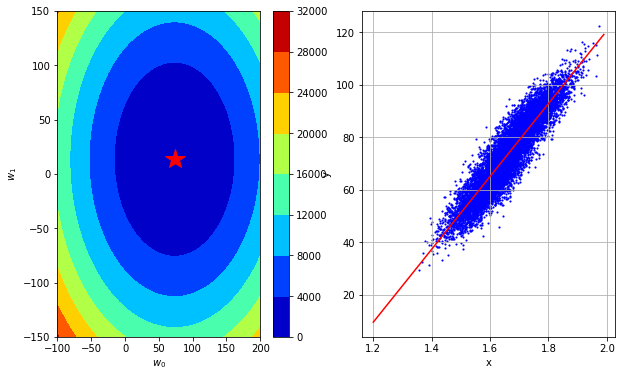

In [31]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=1000)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

## questions:

- how does the  precision vary with the size of the grid ?

In [21]:
np.matmul(tx.T,y)

array([732939.22002105, 134797.12434989])

In [25]:
w_star = [73.293922002105, 13.479712434989]
compute_loss(y,tx, w_star)

In [28]:
compute_loss(y,tx, w_star)

15.3858878688294

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [ ]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and loss
    # ***************************************************
    raise NotImplementedError
    
send(compute_gradient, 2)   

- what is the dimension of the gradient ?

Please fill in the functions `gradient_descent` below:

In [ ]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        raise NotImplementedError
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

send(gradient_descent, 3)

Test your gradient descent function through gradient descent demo shown below:

In [ ]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time=%.3f seconds for %i iterations" %(exection_time, max_iters))
send("Gradient Descent: execution time=%.3f seconds for %i iterations" %(exection_time, max_iters), 4)

In [ ]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

**Plot the Evolution of the excess loss as a function of the number of iterations**

- how fast does it converge to 0
- which theorem form the lecture do you recognize


In [ ]:
plt.semilogy(gradient_losses)
plt.title('Evolution of the excess loss with the number of iterations')
plt.xlabel('number of GD iterations')
plt.ylabel('log(L(w)-L(w^*))')
send(plt,5)

**Change the step size**
- how does the error vary with the step  size
- what is the maximal  step size (fill the following cell  to submit your answer


In [2]:

send('the maximal step size is ???',6)

NameError: name 'send' is not defined

# 4 Stochastic gradient descent

In [ ]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    raise NotImplementedError

send(compute_stoch_gradient,7)
    

def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    raise NotImplementedError
    return losses, ws

send(stochastic_gradient_descent, 8)

In [ ]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))
send("SGD: execution ime=%.3f seconds for %i iterations" %(exection_time, max_iters),9)

In [ ]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

**Questions**:
- change the step size to a decaying sequence of step size. What choice do you recommend?
- what modification of the final iterate would you recommend to improve convergence? 

- What is the complexity per iteration of GD, SGD?
- Compare the theoretical complexity and the time required per iteration for the algorithm




**Plot:**
- Represent both your best version (choice of step size sequence) and  of SGD as a function of the theoretical complexity

- Represent both your best version (choice of step size sequence) and  of SGD as a function of the time taken

Try to choose the best parameters, for the axis, etc. Send us your best plot via the ``send'' below

In [3]:
# Plotting errors in that cell




# Your best plot
send(plt, 10)




NameError: name 'send' is not defined

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent


Load and plot data containing outliers

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)